In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
dataframe = pd.read_csv("covid19_tweets.csv")
dataframe.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
dataframe.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [19]:
print(dataframe.groupby('user_verified').size())

user_verified
False    65082
True      9354
dtype: int64


/var/folders/d7/5b612qh51lv75_t7g0420jjr0000gn/T/ipykernel_3470/1697134265.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataframe.drop(['user_verified'],1).hist()


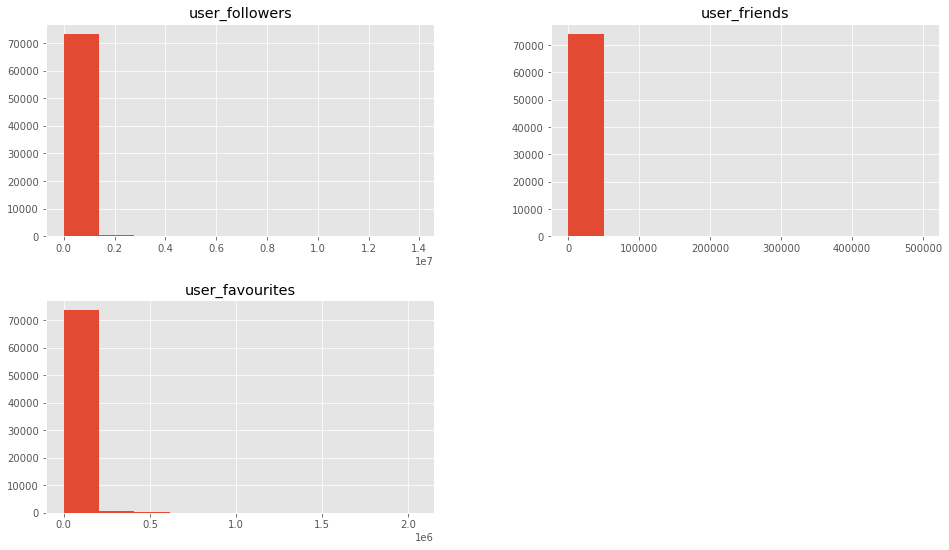

In [20]:
dataframe.drop(['user_verified'],1).hist()
plt.show()

/Users/andreasamanthaaguilar/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


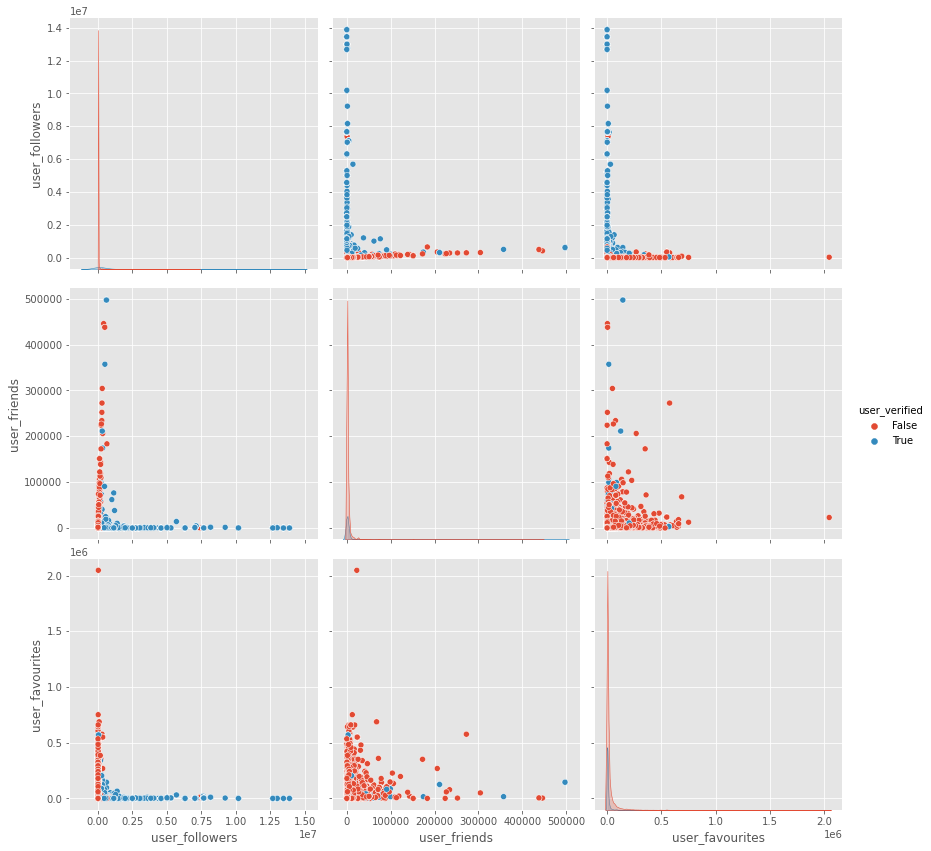

In [21]:
sb.pairplot(dataframe.dropna(), hue='user_verified',size=4,vars=["user_followers","user_friends","user_favourites"],kind='scatter')

In [22]:
X = np.array(dataframe[["user_followers","user_friends","user_favourites"]])
y = np.array(dataframe['user_verified'])
X.shape

(74436, 3)

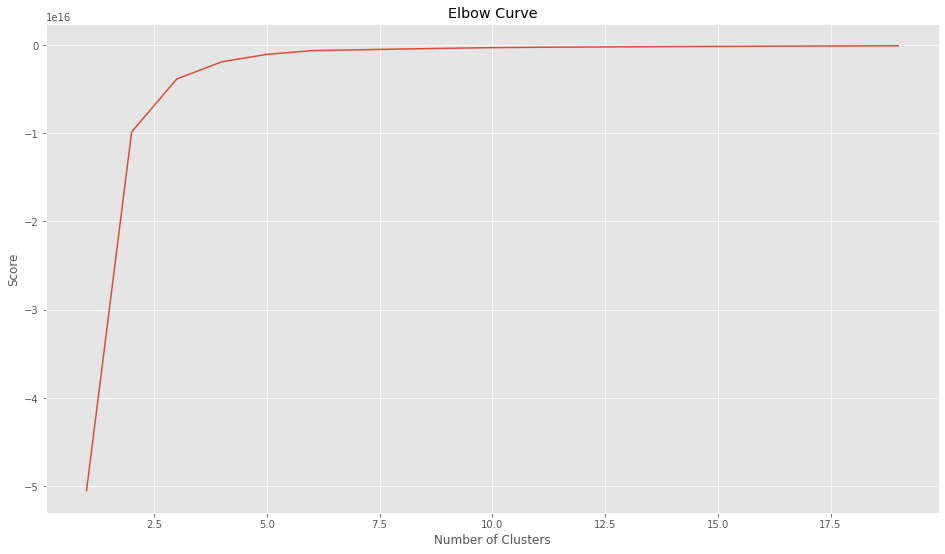

In [23]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[3.12057722e+04 2.17079378e+03 1.54347130e+04]
 [1.30086912e+07 2.19937888e+02 8.03913043e+01]
 [5.77398910e+06 7.12457851e+02 2.63533719e+03]]


/var/folders/d7/5b612qh51lv75_t7g0420jjr0000gn/T/ipykernel_3470/2144393596.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


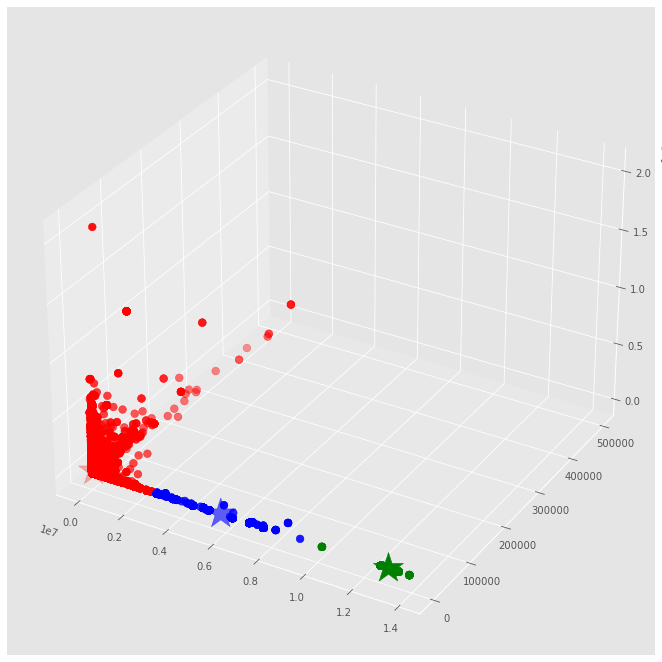

In [30]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

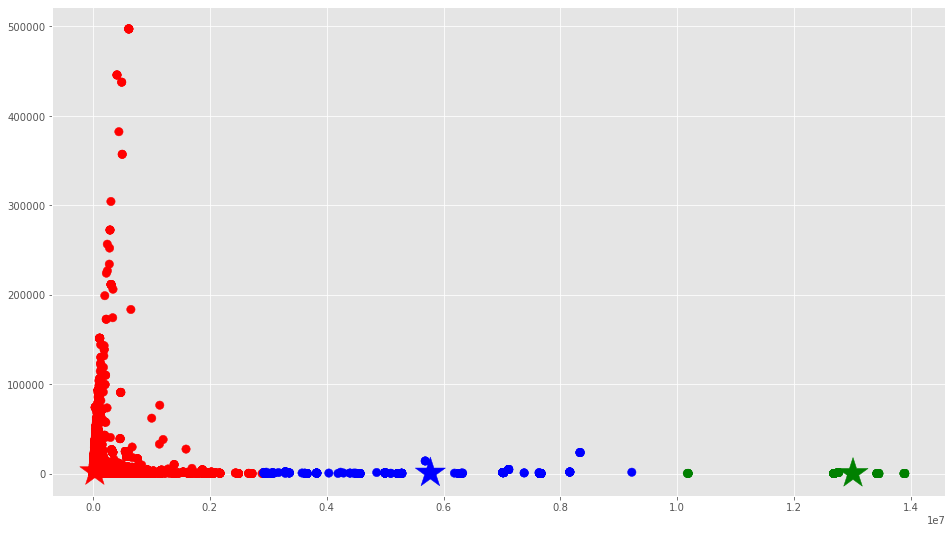

In [31]:
f1 = dataframe['user_followers'].values
f2 = dataframe['user_friends'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

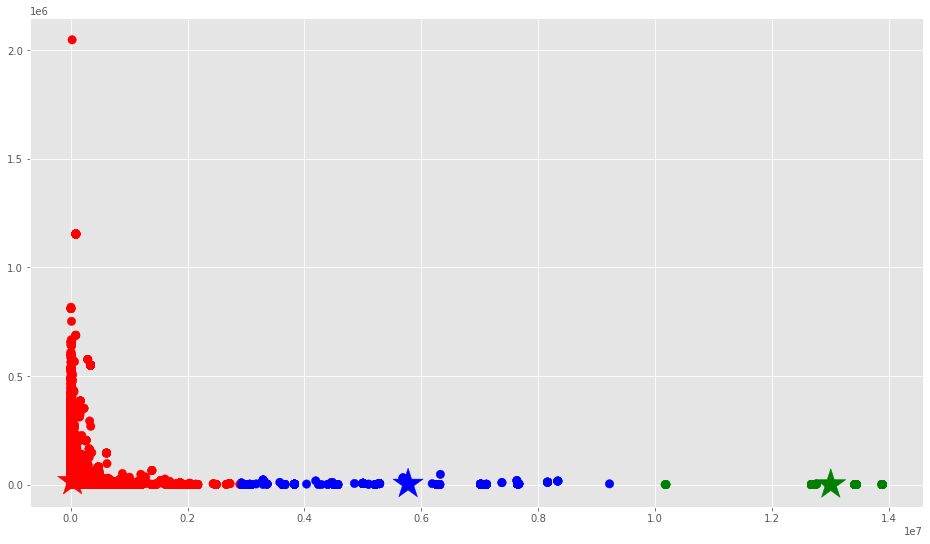

In [32]:
f1 = dataframe['user_followers'].values
f2 = dataframe['user_favourites'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

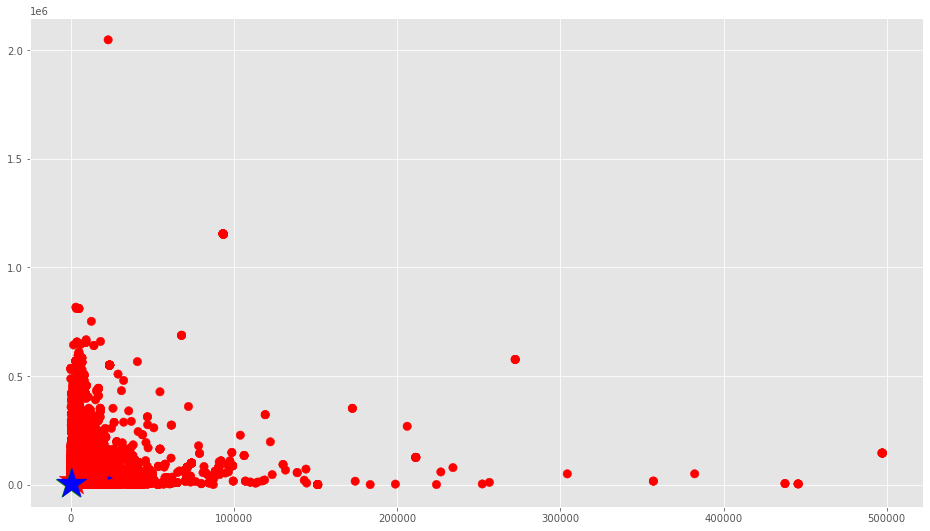

In [33]:
f1 = dataframe['user_friends'].values
f2 = dataframe['user_favourites'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [34]:
copy =  pd.DataFrame()
copy['user_followers']=dataframe['user_followers'].values
copy['date']=dataframe['date'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,73670
1,green,161
2,blue,605


In [37]:
group_referr_index = copy['label'] == 0
group_referrals = copy[group_referr_index]

diversidadGrupo = pd.DataFrame()
diversidadGrupo['user_location'] = ['India','USA']
diversidadGrupo['cantidad'] = group_referrals.groupby('user_followers').size()
diversidadGrupo

,user_location,cantidad
0,India,685
1,USA,484


In [38]:
group_referr_index = copy['label'] == 0
group_referrals = copy[group_referr_index]

diversidadGrupo = pd.DataFrame()
diversidadGrupo['user_name'] = ['2020-07-24','2020-07-29','2020-08-04','2020-08-10','2020-08-16','2020-08-30']
diversidadGrupo['cantidad'] = group_referrals.groupby('user_followers').size()
diversidadGrupo

,user_name,cantidad
0,2020-07-24,685
1,2020-07-29,484
2,2020-08-04,454
3,2020-08-10,360
4,2020-08-16,342
5,2020-08-30,305


In [36]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([14321, 70675, 13688])